# 機械学習の基礎の基礎

## 使用するもの

- Scikit-Learn

# 1. データのロード

In [1]:
# datasetを読み込む
from sklearn.datasets import load_digits
 
# load_digitsの引数でクラス数を指定
# 2なら0と1, 3なら0と1と2が書かれたデータのみに絞られる
# 最大は10で0から9となる
digits = load_digits()

# データ1件あたり、8x8=64の特徴が配列(numpyのndarray)となっていて
# データ件数が1797件分ある
print(digits.data.shape)

(1797, 64)


In [2]:
# dataにデータが入ってる
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [3]:
# 正解ラベルはtargetに入っている
print(digits.target)

[0 1 2 ... 8 9 8]


## データを画像として確認
http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['consolas'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


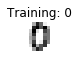

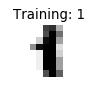

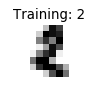

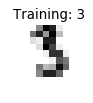

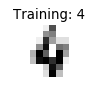

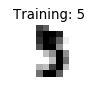

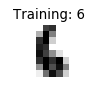

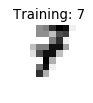

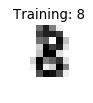

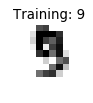

<Figure size 800x480 with 0 Axes>

In [6]:
#データの表示
import matplotlib.pyplot as plt

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
#    font = {'family' : 'consolas',
#            'size'   : 12 }
#    plt.rc('font', **font)
    
    plt.figure(figsize=(10, 6), dpi=80)

# 2. データを分割

In [7]:
# 今回は1500件を学習データ、残りの297件をテストデータにする
x_train = digits.data[:1500]
y_train = digits.target[:1500]
 
x_test = digits.data[1500:]
y_test = digits.target[1500:]

# 3. トレーニング実施

In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# fit関数で学習を行う
lr.fit(x_train, y_train)
 
# predict関数で予測を行う
pred = lr.predict(x_test) 
print(pred)

[3 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 3 7 5 4 4 7 2 8 2 2 5 7 9 5 4
 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 8 1 9 0 1 2 3 4 5 6 9 0 1 2 3 4 5 6 7 1 7 4
 9 1 5 6 5 0 9 8 1 8 4 1 7 7 1 5 1 6 0 2 2 1 8 2 0 1 2 6 8 7 7 7 3 4 6 6 6
 9 9 1 5 0 9 5 2 8 0 1 7 6 3 2 1 7 9 6 3 1 3 9 1 8 6 8 4 3 1 4 0 5 3 6 3 6
 1 7 5 4 4 7 2 2 5 7 3 1 9 4 1 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 8 4 5 6 7
 8 9 0 8 2 8 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 8 8 7 5 8 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 8 7 6 3 2 1 7 4 6 3 1 3
 9 1 7 6 8 4 5 1 4 0 5 3 6 9 6 8 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9
 8]


In [9]:
from sklearn.metrics import confusion_matrix
# 予測結果を、Confusion Matrixで表示
confusion_matrix(y_test, pred, labels=digits.target_names)

array([[25,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0, 26,  0,  2,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 19,  0,  2,  0,  2,  6,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  3],
       [ 0,  2,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 27,  2,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 26,  0],
       [ 0,  2,  0,  2,  0,  0,  0,  1,  0, 26]])

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96        27
          1       0.76      0.84      0.80        31
          2       1.00      1.00      1.00        27
          3       0.83      0.63      0.72        30
          4       0.97      0.91      0.94        33
          5       0.93      0.93      0.93        30
          6       0.97      1.00      0.98        30
          7       0.90      0.90      0.90        30
          8       0.70      0.93      0.80        28
          9       0.90      0.84      0.87        31

avg / total       0.90      0.89      0.89       297

